# Unsupervised Learning - Clustering - Credit Card Customer Data


#### Brief description of the data set and its attributes:

The Attributes Include:

* Sl_No - Customer Serial Identification Number: Serves purpose of indexing values
* Customer Key - Customer Key
* AvgCreditLimit - Average Credit Card Limit For The Customer
* TotalCreditCards - Total Credit Cards Owned by the Customer
* Totalvisitsbank - Total Number of Bank Visits by the Customer
* Totalvisitsonline - Total Visits Online by the Bank Customer
* Totalcallsmade - Total Calls Made by the Customer to the Bank
    
at first glance we can segment the 5 features that i will use to 2 main groups

1. Credit card usage - 2 features- AvgCreditLimit, TotalCreditCards
2. service/marketing channels used - 3 features - Totalvisitsbank, Totalvisitsonline, Totalcallsmade
    
at first we can use basic EDA segmentation - distribution of Credit cards, Average limit

    
#### in  Total - 7 rows × 660 columns

#### Main objective will focus on Clustering the customers

I would like to set the main objective to be basic segmentation of the customers - Clustering.
since the numbers of features that i will use - 5 in total(Sl_no & customer Key are not relevant) - there is no need to user dimensionality reduction.

looking at the data itself - it will be required to scale the data - since AvgCreditLimit is around 

furthermore,
I would like to segment them and understand how the features effect the clustering, 

Main Benefits:
since features like visits/calls can make a great deal on understanding in which marketing/service channel we should focus by that we can understand by the number of Credit cards and the limit which are the "top" customers and which channels they use.

all the above and the changes made to the service channel can increase "Sales" - in the forms of credit limit increase/# cards increase
 
 
In this is notebook i will use 2 main models

1. K-Means - running all inertia scores up to k=10 
2. Agglomerative Clustering with n=2,3,4


let's begin...

---

# Part 1a(Cleaning/Preparation):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
#%matplotlib inline

#import the dataframe from the file
df = pd.read_csv('Credit Card Customer Data.csv')
#check for values that are not unique in the Customer Key
df['Customer Key'].unique

<bound method Series.unique of 0      87073
1      38414
2      17341
3      40496
4      47437
       ...  
655    51108
656    60732
657    53834
658    80655
659    80150
Name: Customer Key, Length: 660, dtype: int64>

In [2]:
#remove 2 columns that are not actual data features 
df = df.drop(columns=['Sl_No','Customer Key'])
df
# we have now the dataset without the columns that are not relevant for the modeling

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [3]:
#check for null values
df.notna().sum()

Avg_Credit_Limit       660
Total_Credit_Cards     660
Total_visits_bank      660
Total_visits_online    660
Total_calls_made       660
dtype: int64

In [5]:
df.shape

(660, 5)

In [4]:
df.dtypes
#since no further cleaning/feature engineering is required - we will move on to the next step

Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

---------------------------------------

# Part 1b(EDA):

In [7]:
# before training the models i would like to understand furtermore the data

#will check to see what unique values for the 'Avg_Credit_Limit' Feature
df.Avg_Credit_Limit.sort_values(ascending=True).unique()

array([  3000,   5000,   6000,   7000,   8000,   9000,  10000,  11000,
        12000,  13000,  14000,  15000,  16000,  17000,  18000,  19000,
        20000,  25000,  26000,  27000,  28000,  29000,  30000,  31000,
        32000,  33000,  34000,  35000,  36000,  37000,  38000,  39000,
        40000,  41000,  42000,  43000,  44000,  45000,  46000,  47000,
        48000,  49000,  50000,  51000,  52000,  54000,  55000,  56000,
        57000,  58000,  59000,  60000,  61000,  62000,  63000,  64000,
        65000,  66000,  67000,  68000,  69000,  70000,  71000,  72000,
        73000,  74000,  75000,  84000,  91000,  94000,  95000,  96000,
        97000,  98000,  99000, 100000, 106000, 108000, 111000, 112000,
       114000, 121000, 123000, 126000, 127000, 131000, 132000, 136000,
       144000, 145000, 146000, 153000, 155000, 156000, 157000, 158000,
       163000, 166000, 167000, 171000, 172000, 173000, 176000, 178000,
       183000, 184000, 186000, 187000, 195000, 200000])

In [8]:
# brief overview of Credit card limit value counts
df.Avg_Credit_Limit.value_counts()

8000      35
6000      31
9000      28
13000     28
19000     26
          ..
43000      1
146000     1
155000     1
200000     1
167000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

In [9]:
#display the Dist using Pandas of credit cards - 
df.Total_Credit_Cards.value_counts().sort_values

<bound method Series.sort_values of 4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64>

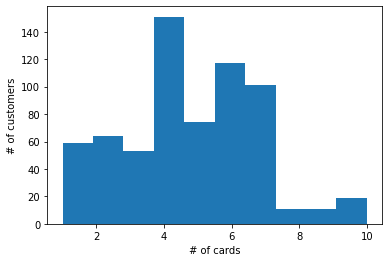

In [18]:
#plot the distribution of # of credit cards vs # of customers holding those credit cards
plt.hist(df.Total_Credit_Cards)
plt.xlabel('# of cards')
plt.ylabel('# of customers')
plt.show()

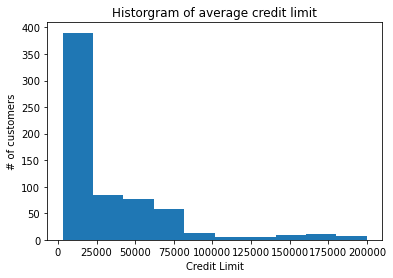

In [17]:
#plot the historgram of average credit limit
plt.hist(df.Avg_Credit_Limit, bins=10)
plt.title("Historgram of average credit limit")
plt.xlabel('Credit Limit')
plt.ylabel('# of customers')
plt.show()
#we can see that most of the customer are on the left side - which makes sense

In [12]:
#check the correlation between the features:
df_corr = df.corr().abs()

df_corr = df_corr.replace(to_replace=1.0, value=0)

df_corr.style.background_gradient(cmap='coolwarm')
# we can see that the value with the highest corr is 'Total_calls_made' & 'Total_Credit_Cards'

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,0.000000,0.608860,0.100312,0.551385,0.414352
Total_Credit_Cards,0.608860,0.000000,0.315796,0.167758,0.651251
Total_visits_bank,0.100312,0.315796,0.000000,0.551861,0.506016
Total_visits_online,0.551385,0.167758,0.551861,0.000000,0.127299
Total_calls_made,0.414352,0.651251,0.506016,0.127299,0.000000


In [13]:
df_corr.idxmax()

Avg_Credit_Limit        Total_Credit_Cards
Total_Credit_Cards        Total_calls_made
Total_visits_bank      Total_visits_online
Total_visits_online      Total_visits_bank
Total_calls_made        Total_Credit_Cards
dtype: object

------------------------------------

# Part 2:

after EDA - the feature "Avg_Credit_Limit" needs to be scaled otherwise the clustering in KMeans which relies on distance will disrupt the model ability to cluster.

In [129]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

scaled_df = pd.DataFrame(mms.fit_transform(df),columns=df.columns)

#display the scaled data
scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3
...,...,...,...,...,...
655,0.487310,1.000000,0.2,0.666667,0.0
656,0.411168,1.000000,0.2,0.866667,0.2
657,0.720812,0.777778,0.2,0.600000,0.1
658,0.857868,1.000000,0.2,1.000000,0.0


-------------

# Part 3:

### Train the Models:

### K-Means:

Text(0, 0.5, 'Inertia')

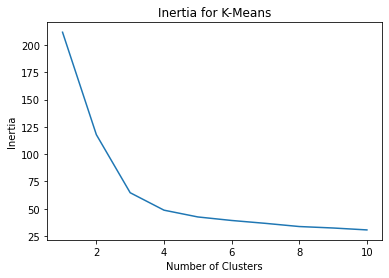

In [142]:
from sklearn.cluster import KMeans

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(scaled_df)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.title('Inertia for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


We can see that the inertia stabilizes at around k=4, therefor the recommended clustering is 4 groups

In [45]:
#run Kmeans with k=4
km = KMeans(n_clusters=4)
km.fit(scaled_df)

KMeans(n_clusters=4)

In [50]:
#inverse the scaling
df_clustered = pd.DataFrame(mms.inverse_transform(scaled_df),columns=df.columns)
df_clustered

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.0,2.0,1.0,1.0,0.0
1,50000.0,3.0,0.0,10.0,9.0
2,50000.0,7.0,1.0,3.0,4.0
3,30000.0,5.0,1.0,1.0,4.0
4,100000.0,6.0,0.0,12.0,3.0
...,...,...,...,...,...
655,99000.0,10.0,1.0,10.0,0.0
656,84000.0,10.0,1.0,13.0,2.0
657,145000.0,8.0,1.0,9.0,1.0
658,172000.0,10.0,1.0,15.0,0.0


In [197]:
#add the cluster to the data frame
df_clustered.insert(loc=5,column='Cluster',value=km.labels_)

In [52]:
#display the data with the clustering
df_clustered

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000.0,2.0,1.0,1.0,0.0,0
1,50000.0,3.0,0.0,10.0,9.0,1
2,50000.0,7.0,1.0,3.0,4.0,0
3,30000.0,5.0,1.0,1.0,4.0,0
4,100000.0,6.0,0.0,12.0,3.0,2
...,...,...,...,...,...,...
655,99000.0,10.0,1.0,10.0,0.0,2
656,84000.0,10.0,1.0,13.0,2.0,2
657,145000.0,8.0,1.0,9.0,1.0,2
658,172000.0,10.0,1.0,15.0,0.0,2


#### Visualize the Results:

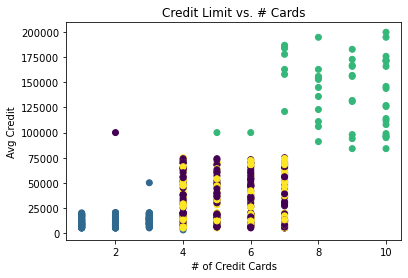

In [122]:
#plot a scatter of the clusters - Credit Limit vs. # Cards'
plt.scatter(df_clustered.Total_Credit_Cards,df_clustered.Avg_Credit_Limit,c=df_clustered.Cluster)
plt.xlabel('# of Credit Cards')
plt.ylabel('Avg Credit')
plt.title('Credit Limit vs. # Cards')
plt.show()
# we can see te obvious that the # of credit cards is correlated with the average credit limit.

we can see the obvious - that the # of credit cards is correlated with the average credit limit.
However we must remember:

The corr matrix showed that the higher correlation is between 'Total_calls_made' & 'Total_Credit_Cards'

Let's plot that as well:

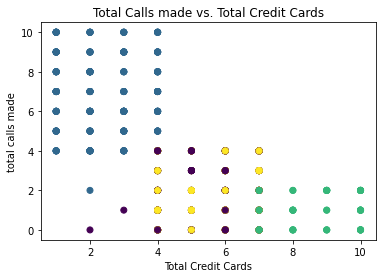

In [127]:
#plot a scatter of the clusters - Total_calls_made' & 'Total_Credit_Cards
plt.scatter(df_clustered.Total_Credit_Cards,df_clustered.Total_calls_made,c=df_clustered.Cluster)
plt.xlabel('Total Credit Cards')
plt.ylabel('total calls made')
plt.title('Total Calls made vs. Total Credit Cards')
plt.show()

Preliminary conclusion: Credit Owner that has large amount of cards uses the telephone less,

Finally - let's take a look at Visits on-line vs. Avg Card Limit

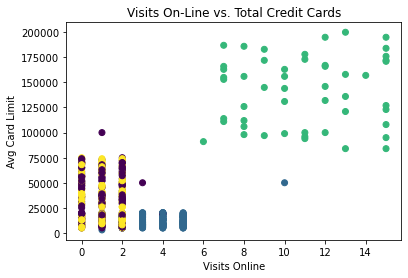

In [193]:
#plot a scatter of the clusters - Visits online vs. Avg Card Limit
plt.scatter(df_clustered.Total_visits_online,df_clustered.Avg_Credit_Limit,c=df_clustered.Cluster)
plt.xlabel('Visits Online')
plt.ylabel('Avg Card Limit')
plt.title('Visits On-Line vs. Total Credit Cards')
plt.show()

Preliminary conclusion: Credit Owner that has High credit limit tends to visit the on-line channel more often,
and probably has more credit cards

### Agglomerative Clustering:

Run AgglomerativeClustering with n_clusters=2

In [158]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2,linkage='ward', compute_full_tree=True)
df_ag = ag.fit(scaled_df)
#display the "auto" model parameters
ag.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': True,
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 2}

In [159]:
#store the label for each parameter this case n=2
ag2 = ag.labels_

Run AgglomerativeClustering with n_clusters=3

In [161]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3,linkage='ward', compute_full_tree=True)
df_ag = ag.fit(scaled_df)
#display the "auto" model parameters
ag.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': True,
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 3}

In [160]:
#store the label for each parameter this case n=3
ag3 = ag.labels_

Run AgglomerativeClustering with n_clusters=4

In [164]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=4,linkage='ward', compute_full_tree=True)
df_ag = ag.fit(scaled_df)
#display the "auto" model parameters
ag.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': True,
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 4}

In [166]:
#store the label for each parameter this case n=4
ag4 = ag.labels_

In [174]:
#add the diff n's to the DF
df_clustered.insert(loc=6,column='ag_n2',value=ag2)
df_clustered.insert(loc=7,column='ag_n3',value=ag3)
df_clustered.insert(loc=8,column='ag_n4',value=ag4)

ValueError: cannot insert ag_n2, already exists

In [179]:
#display the DF 
df_clustered
# we can see the different clustering from n=2 till n=4 using Agglomerative Clustering

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster,ag_n2,ag_n3,ag_n4
0,100000.0,2.0,1.0,1.0,0.0,0,0,0,1
1,50000.0,3.0,0.0,10.0,9.0,1,1,1,0
2,50000.0,7.0,1.0,3.0,4.0,0,0,0,1
3,30000.0,5.0,1.0,1.0,4.0,0,1,1,0
4,100000.0,6.0,0.0,12.0,3.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...
655,99000.0,10.0,1.0,10.0,0.0,2,0,0,2
656,84000.0,10.0,1.0,13.0,2.0,2,0,0,2
657,145000.0,8.0,1.0,9.0,1.0,2,0,0,2
658,172000.0,10.0,1.0,15.0,0.0,2,0,0,2


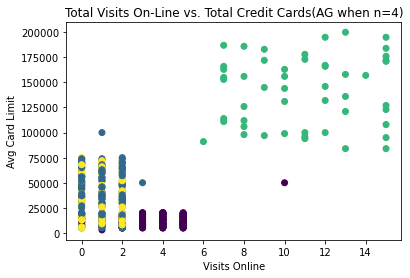

In [195]:
#plot a scatter of the clusters for AG n=4
#Visits online vs. Avg Card Limit
plt.scatter(df_clustered.Total_visits_online,df_clustered.Avg_Credit_Limit,c=df_clustered.ag_n4)
plt.xlabel('Visits Online')
plt.ylabel('Avg Card Limit')
plt.title('Total Visits On-Line vs. Total Credit Cards(AG when n=4)')
plt.show()

Preliminary conclusion: Agglomerative Clustering Yields a very similar clustering as K Means

Now let's have a look at the Bank visits vs the Credit Limit

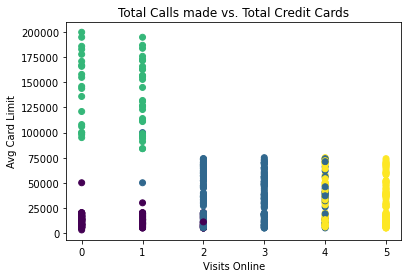

In [196]:
#plot a scatter of the clusters for AG n=4
#Visits online vs. Avg Card Limit
plt.scatter(df_clustered.Total_visits_bank,df_clustered.Avg_Credit_Limit,c=df_clustered.ag_n4)
plt.xlabel('Visits Online')
plt.ylabel('Avg Card Limit')
plt.title('Total Calls made vs. Total Credit Cards')
plt.show()

---


# Insights and key findings:


## Recommendatios:

The Main recommendation to the decision makers will be to strengthen the On-line channel - marketing and service wise - since the majority of the high credit limit operates there, and there is a higher chance of "high" credit customers visiting and operating in this channel.

this can result in improving the customer satisfaction with the credit services

## Insights:

* both models obtained similar results of clustering
* the high Credit owners visits the On-Line channel the most
* low credit owners still visits to the bank


---

## Next steps:

The next recommended steps:

* continue collecting more data with various features to further understand the customer behavior in the On-Line Channel
* improve the On-line channel's ability to support the customers
